# Libraries and Data

In [ ]:
# Reinstall prophet and cmdstanpy to resolve potential dependency issues
!pip uninstall -y prophet cmdstanpy -q
!pip install prophet cmdstanpy -q

In [ ]:
# Mount Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the folder
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques/Prophet

/content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques/Prophet


In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [ ]:
# Load the daily bike sharing train data
df = pd.read_csv("Daily Bike Sharing training.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [ ]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)
# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [ ]:
# Renaming columns 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [ ]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [ ]:
# Look at 2012-10-29
df[df.ds == '2012-10-29']

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
667,2012-10-29,0,1,3,0.44,0.4394,0.88,0.3582,22,False,True


In [ ]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

# Exploratory Data Analysis

In [ ]:
# Create a copy of the df with index
df_temp = df.copy()
df_temp.set_index('ds', inplace = True)

In [ ]:
# Set the frequency of the DataFrame index to daily ("D")
df_temp.index.freq = "D"
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

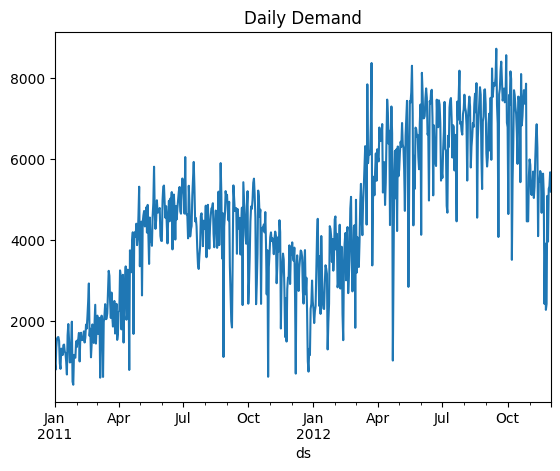

In [ ]:
# Daily demand line plot
df_temp['y'].plot(title = 'Daily Demand')
plt.show()

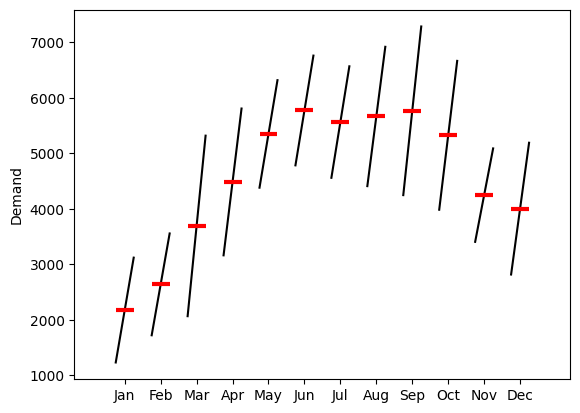

In [ ]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of bike sharing demand
month_plot(df_temp['y'].resample('ME').mean(),
           ylabel = 'Demand')
plt.show()

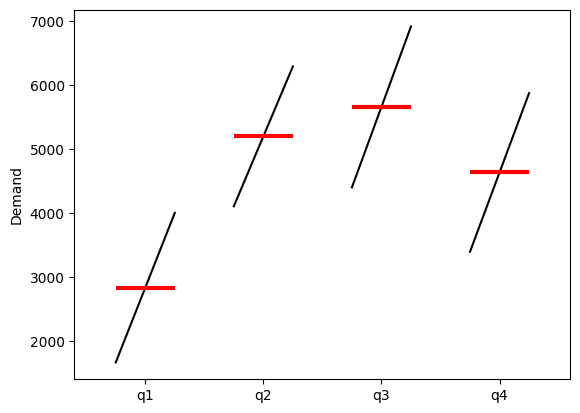

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of bike sharing demand
quarter_plot(df_temp['y'].resample('QE').mean(),
           ylabel = 'Demand')
plt.show()

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


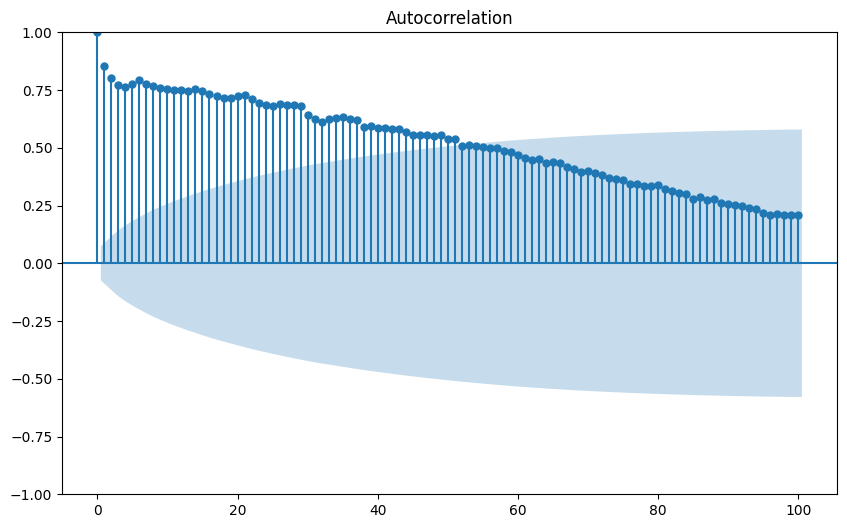

In [ ]:
# Plot the autocorrelation (ACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_temp['y'], lags = 100, ax = ax)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

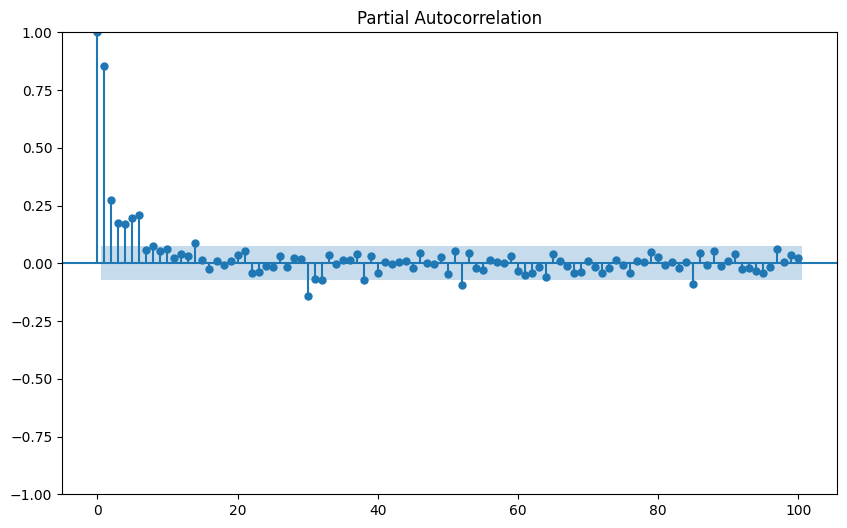

In [ ]:
# Plot the partial autocorrelation (PACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df_temp['y'], lags = 100, ax = ax)
plt.show()

Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Holidays

In [ ]:
# Check the holidays in our df
df[df.holiday == 1].ds

,ds
16,2011-01-17
51,2011-02-21
104,2011-04-15
149,2011-05-30
184,2011-07-04
247,2011-09-05
282,2011-10-10
314,2011-11-11
327,2011-11-24
359,2011-12-26


In [ ]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [ ]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


# Feature Engineering

Purpose of lagged values:
- Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
- Lagged values give the model information about recent trends and behaviors.
- Lags at specific intervals (e.g., 7 days, 12 months) can help capture seasonal patterns.
- Many time series are autoregressive, where future values depend on past values. Lagged features directly model this dependency.




In [ ]:
# Series.shift(n) - each value is moved to the n row(s) below its current position

# Create lagged values for the regressors 'temp' and 'atemp' with specified lags
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)  # Create lagged values for 'temp'
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)  # Create lagged values for 'atemp'

df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN


In [ ]:
# Correlation matrix between the lagged values and y
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
df[columns].corr()

,y,temp_lag_1,temp_lag_3,temp_lag_5,temp_lag_7,atemp_lag_1,atemp_lag_3,atemp_lag_5,atemp_lag_7
y,1.000000,0.590368,0.581922,0.589976,0.595830,0.586681,0.577076,0.587374,0.591886
temp_lag_1,0.590368,1.000000,0.892245,0.861173,0.864545,0.991526,0.882663,0.847990,0.852673
temp_lag_3,0.581922,0.892245,1.000000,0.891829,0.860613,0.877489,0.991519,0.882187,0.847451
temp_lag_5,0.589976,0.861173,0.891829,1.000000,0.891432,0.848465,0.877082,0.991490,0.881814
temp_lag_7,0.595830,0.864545,0.860613,0.891432,1.000000,0.853113,0.847940,0.876584,0.991475
atemp_lag_1,0.586681,0.991526,0.877489,0.848465,0.853113,1.000000,0.869430,0.836607,0.842372
atemp_lag_3,0.577076,0.882663,0.991519,0.877082,0.847940,0.869430,1.000000,0.868989,0.836076
atemp_lag_5,0.587374,0.847990,0.882187,0.991490,0.876584,0.836607,0.868989,1.000000,0.868539
atemp_lag_7,0.591886,0.852673,0.847451,0.881814,0.991475,0.842372,0.836076,0.868539,1.000000


# Prophet Model

In [ ]:
# Look at df
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Kick out all lagged variables but the temp_lag1
df = df.iloc[:,:-7]
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


In [ ]:
# Remove any NAs
df = df.dropna()

In [ ]:
from prophet import Prophet

In [ ]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    seasonality_prior_scale=10,  # Increase flexibility of seasonality
    holidays_prior_scale=10,     # Increase impact of holidays
    changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes
)

# Add additional regressors (external factors) to the model
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weathersit_2")  # Weather situation category 2
m.add_regressor("weathersit_3")  # Weather situation category 3
m.add_regressor("temp_lag_1")    # Temperature from previous time step

# Fit the model to the data
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.448230,0.448230,0.448230
1,temp,multiplicative,0.502959,1.188666,1.188666,1.188666
2,atemp,multiplicative,0.481015,0.342352,0.342352,0.342352
3,hum,multiplicative,0.625459,-0.415851,-0.415851,-0.415851
4,windspeed,multiplicative,0.190577,-0.590206,-0.590206,-0.590206
5,weathersit_2,multiplicative,0.000000,-0.115913,-0.115913,-0.115913
6,weathersit_3,multiplicative,0.000000,-0.469911,-0.469911,-0.469911
7,temp_lag_1,multiplicative,0.503024,-0.571820,-0.571820,-0.571820


In [ ]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 44.82% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 118.87% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 34.24% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 41.59% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 59.02% (multiplicatively).
For each unit increase in weathersit_2, the target variable is expected to decrease by 11.59% (multiplicatively).
For each unit increase in weathersit_3, the target variable is expected to decrease by 46.99% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 57.18% (multiplicatively).


# Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
# How many days we have in the dataset
df.shape[0] -180

520

In [ ]:
# Apply the CV to the model
df_cv = cross_validation(model = m,
                         period = '15 days',      # Step size between cutoff dates
                         initial = '521 days',    # Size of initial training period
                         horizon = '30 days',     # Forecast horizon
                         parallel ='processes')  # Use parallel processing for faster computation

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f11664cf860>


In [ ]:
# CV output
# yhat - the predicted value (forecast) for the target variable
# yhat_lower - lower bounds of the predicted forecast
# yhat_upper - upper bounds of the predicted forecast
# y - the actual observed values of the target variable
# cutoff - defines the point in time where the validation set begins

df_cv.head()

In [ ]:
# Performance Metrics
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.591031e+06,1261.360842,1000.132174,0.174698,0.124849,0.166258,0.533333
1,4 days,1.426143e+06,1194.212092,934.742984,0.156520,0.116548,0.151778,0.533333
2,5 days,1.471865e+06,1213.204488,966.709165,0.157546,0.110663,0.153219,0.466667
3,6 days,1.146910e+06,1070.938755,852.419013,0.132846,0.089614,0.134467,0.500000
4,7 days,1.236445e+06,1111.955466,868.194133,0.131164,0.089614,0.136146,0.500000
5,8 days,1.001902e+06,1000.950416,764.596263,0.107564,0.087141,0.115711,0.566667
6,9 days,9.584884e+05,979.024188,763.311539,0.107518,0.093548,0.114192,0.533333
7,10 days,1.401179e+06,1183.713884,888.127403,0.128911,0.096708,0.131643,0.500000
8,11 days,1.492019e+06,1221.482273,908.185192,0.135645,0.096017,0.136172,0.466667
9,12 days,1.925474e+06,1387.614608,1072.709699,0.168293,0.115892,0.171555,0.400000


In [ ]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1263.0
The MAPE is 15.94 %


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


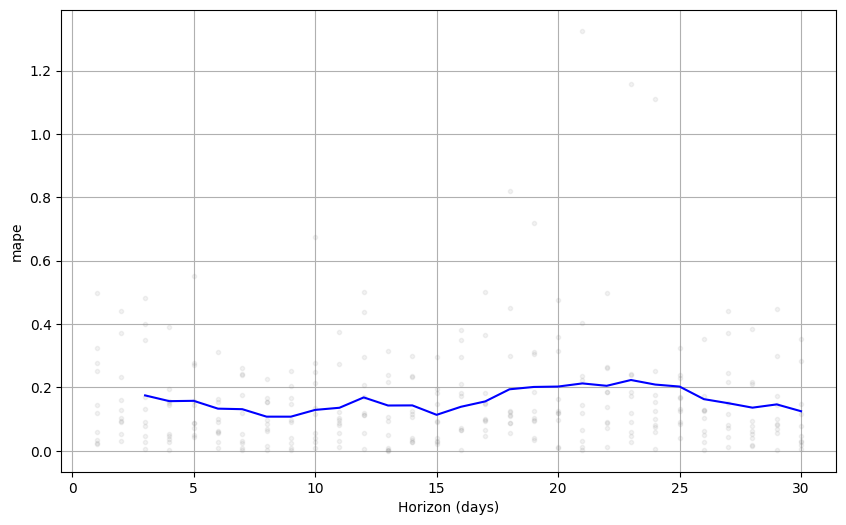

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

# Exploring the Error

In [ ]:
# Compute the Error / deviation
# absolute difference between predicted ('yhat') and actual ('y') values
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
# the percentage deviation of predicted from actual values
df_cv['deviation_%'] = (df_cv['yhat'] / df_cv['y'] - 1) *100

In [ ]:
# Days with the highest percentage deviation
df_cv.sort_values(by = 'deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
290,2012-11-22,5640.385320,4840.635946,6429.773902,2425,2012-11-01,3215.385320,132.593209
292,2012-11-24,4910.404855,4092.637210,5707.558255,2277,2012-11-01,2633.404855,115.652387
293,2012-11-25,5112.630094,4286.071592,5888.683221,2424,2012-11-01,2688.630094,110.917083
17,2012-07-07,8801.463540,8081.850818,9535.057791,4840,2012-06-19,3961.463540,81.848420
18,2012-07-08,8028.202612,7308.234369,8719.023148,4672,2012-06-19,3356.202612,71.836529
9,2012-06-29,9149.309455,8432.783157,9892.221879,5463,2012-06-19,3686.309455,67.477749
214,2012-10-07,5445.510588,4653.827757,6186.082884,3510,2012-10-02,1935.510588,55.142752
11,2012-07-01,8310.676003,7599.625625,8995.227180,5531,2012-06-19,2779.676003,50.256301
180,2012-09-18,6097.813793,5297.919856,6908.840797,4073,2012-09-17,2024.813793,49.713081
291,2012-11-23,5852.414424,5055.288348,6648.022279,3910,2012-11-01,1942.414424,49.678118


In [ ]:
# Days with the lowest deviation
df_cv.sort_values(by = 'deviation', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
47,2012-07-22,4063.253564,3314.337615,4826.696990,7410,2012-07-04,-3346.746436,-45.165269
50,2012-07-25,4868.367144,4137.656066,5587.850676,8173,2012-07-04,-3304.632856,-40.433535
88,2012-08-17,3949.130423,3183.827740,4724.993691,7148,2012-07-19,-3198.869577,-44.751953
57,2012-08-01,4658.712265,3907.800763,5354.162439,7580,2012-07-04,-2921.287735,-38.539416
49,2012-07-24,4872.798143,4126.718021,5555.960822,7592,2012-07-04,-2719.201857,-35.816674
56,2012-07-31,4541.725622,3823.053125,5283.872105,7216,2012-07-04,-2674.274378,-37.060343
62,2012-07-22,4826.152533,4040.468176,5599.791443,7410,2012-07-19,-2583.847467,-34.869736
65,2012-07-25,5616.674595,4809.116845,6337.932561,8173,2012-07-19,-2556.325405,-31.277688
59,2012-08-03,4647.860766,3901.600050,5342.493852,7175,2012-07-04,-2527.139234,-35.221453
55,2012-07-30,4607.460504,3855.549526,5335.261502,7105,2012-07-04,-2497.539496,-35.151858


# Parameter Tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [ ]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [ ]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
      yearly_seasonality=True,
      weekly_seasonality= True,
      holidays = holidays,
      **params)
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')


  # Compute and Store the Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyqj6khm/ocr758t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyqj6khm/muz90q3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34104', 'data', 'file=/tmp/tmplyqj6khm/ocr758t_.json', 'init=/tmp/tmplyqj6khm/muz90q3m.json', 'output', 'file=/tmp/tmplyqj6khm/prophet_modelw9cjqc3z/prophet_model-20250711120321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

In [ ]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,additive,10,983.910230
1,0.05,10,additive,20,981.874867
2,0.05,10,multiplicative,10,1263.286345
3,0.05,10,multiplicative,20,1263.087048
4,0.05,20,additive,10,982.518742
5,0.05,20,additive,20,981.739288
6,0.05,20,multiplicative,10,1263.027453
7,0.05,20,multiplicative,20,1268.578399
8,0.50,10,additive,10,1139.211725
9,0.50,10,additive,20,1153.066027


In [ ]:
# Fetch the best params
best_params = all_params[tuning_results.index(min(tuning_results))]

# Predict the future

In [ ]:
# Load the daily bike sharing training data
df_train = pd.read_csv("Daily Bike Sharing training.csv")
# Load the daily bike sharing future data
df_future = pd.read_csv("Daily Bike Sharing future.csv")

# concat both together
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [ ]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      701 non-null    float64
 14  registered  701 non-null    float64
 15  cnt         701 non-null    float64
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [ ]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)

# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [ ]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,False,False


In [ ]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False


In [ ]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [ ]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's Eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [ ]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


In [ ]:
# Creating lagged values for the regressors
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN


# Prophet Model

In [ ]:
# Just the train data (excluding last 30 points)
train = df.iloc[:-30]

In [ ]:
# Remove any NAs
train = train.dropna()

In [ ]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality= True,
    holidays = holidays,
    **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyqj6khm/z7dlapeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyqj6khm/l5cqmp5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42812', 'data', 'file=/tmp/tmplyqj6khm/z7dlapeh.json', 'init=/tmp/tmplyqj6khm/l5cqmp5i.json', 'output', 'file=/tmp/tmplyqj6khm/prophet_modelom60mb5m/prophet_model-20250711120351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [ ]:
# Drop columns 'ds' and 'y' from DataFrame df to create future_regressors
future_regressors = df.drop(columns = ['ds', 'y'])
# Drop rows with missing values (NaNs) from future_regressors
future_regressors = future_regressors.dropna()
# Reset the index
future_regressors.reset_index(drop = True, inplace = True)

In [ ]:
# Create a future dataframe using Prophet's make_future_dataframe method
future = m.make_future_dataframe(periods = 30)
# Concatenate future dataframe with future_regressors along axis 1 (columns)
future = pd.concat([future, future_regressors], axis = 1)

In [ ]:
# Using the Prophet model to generate predictions for future timestamps
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,atemp,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,2012-12-27,6538.031791,2107.716570,3814.851729,6537.452242,6538.620466,-3539.992092,-3539.992092,-3539.992092,-336.296339,...,643.293622,643.293622,643.293622,-514.715582,-514.715582,-514.715582,0.0,0.0,0.0,2998.039699
726,2012-12-28,6544.103884,3668.124513,5413.088666,6543.467530,6544.752327,-2024.784118,-2024.784118,-2024.784118,-298.744522,...,643.293622,643.293622,643.293622,-526.501737,-526.501737,-526.501737,0.0,0.0,0.0,4519.319765
727,2012-12-29,6550.175977,3316.352873,5030.188850,6549.494699,6550.873424,-2381.794412,-2381.794412,-2381.794412,-315.463304,...,0.000000,0.000000,0.000000,-538.233582,-538.233582,-538.233582,0.0,0.0,0.0,4168.381565
728,2012-12-30,6556.248071,3382.559225,5098.827435,6555.521983,6557.006208,-2314.515325,-2314.515325,-2314.515325,-329.609355,...,0.000000,0.000000,0.000000,-549.571199,-549.571199,-549.571199,0.0,0.0,0.0,4241.732745
729,2012-12-31,6562.320164,2314.510851,4103.703285,6561.487873,6563.119014,-3315.992289,-3315.992289,-3315.992289,-340.467441,...,643.293622,643.293622,643.293622,-560.204619,-560.204619,-560.204619,0.0,0.0,0.0,3246.327875


# Data Viz with ChatGPT

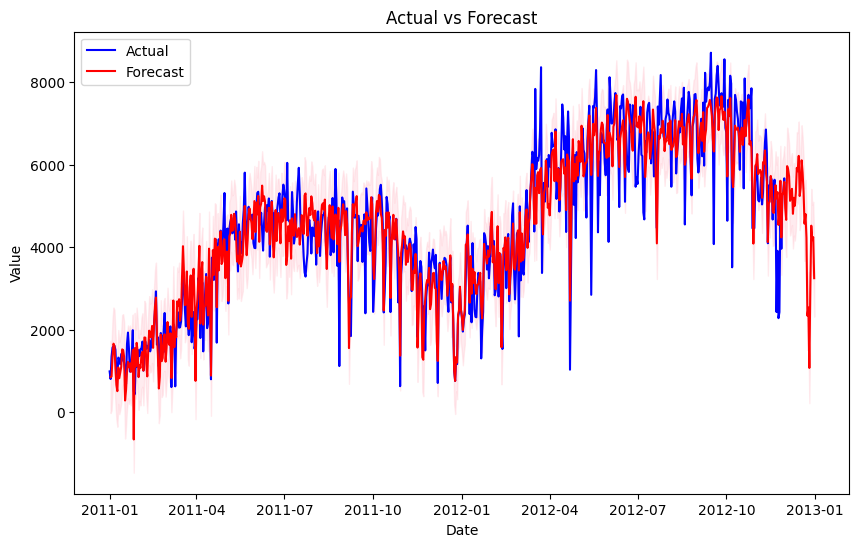

In [ ]:
# Visualize time series plot
plt.figure(figsize=(10, 6))
# Plot actual and forecasted values
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
# Fill the uncertainty interval (between yhat_lower and yhat_upper) with a pink color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
# add title, xlabel, ylabel, legend
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

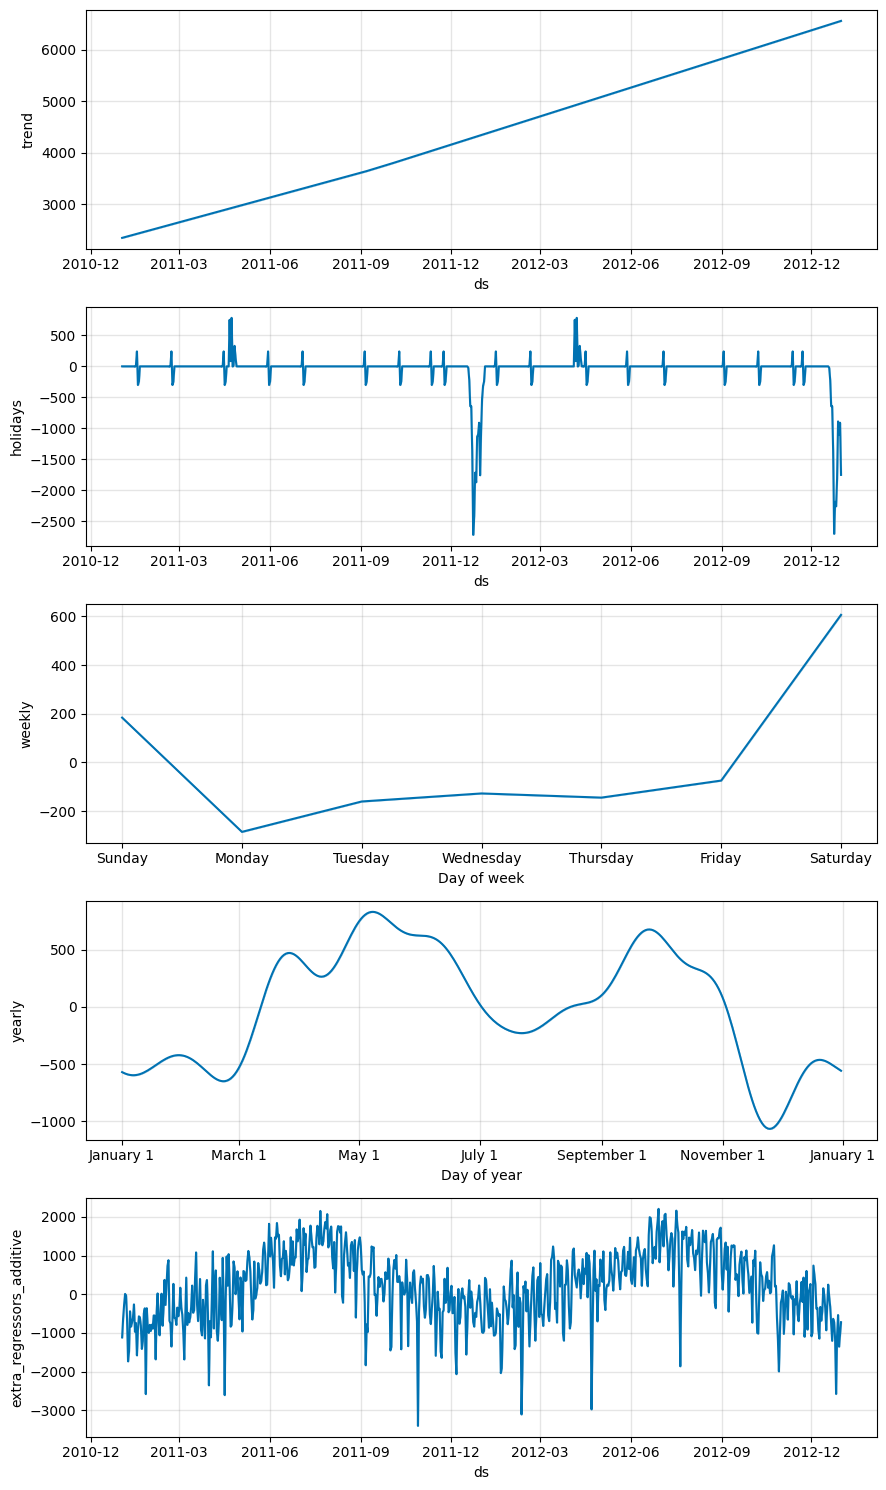

In [ ]:
# Visualize components plot
# 1. Trend: Shows the overall trend of the time series over time.
# 2. Holidays : Shows the effect of holidays on the forecast.
# 3. Weekly Seasonality: Shows patterns that repeat weekly.
# 4. Yearly Seasonality: Displays patterns that repeat annually.
# 4. Other Regressors: Displays the impact of additional regressors added to the model.
m.plot_components(forecast)
plt.show()

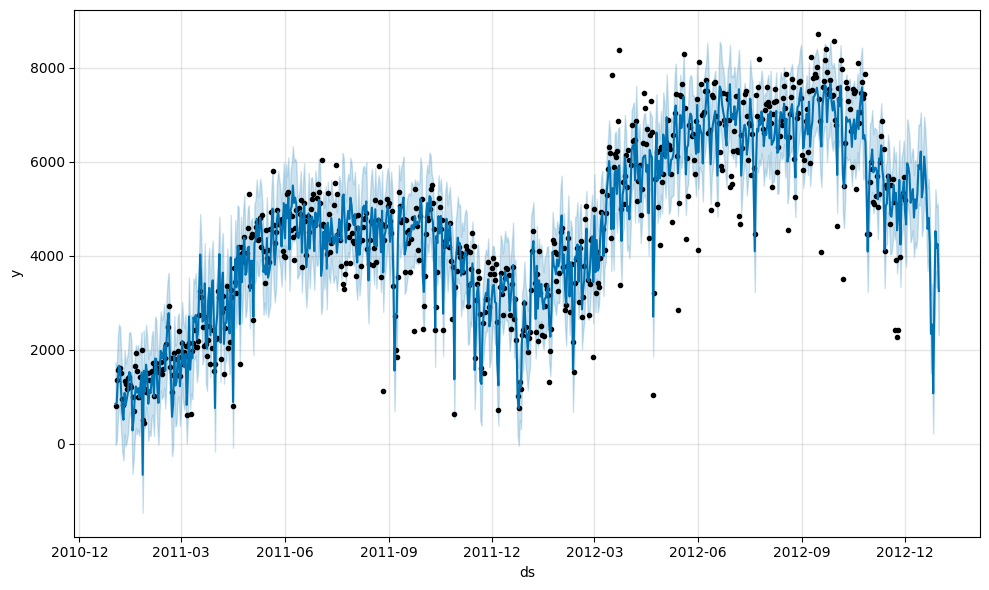

In [ ]:
# Visualize forecast plot with uncertainty bounds
m.plot(forecast)
plt.show()

In [ ]:
# Interactive visualization (using Plotly)
from prophet.plot import plot_plotly
import plotly.offline as py

# Use Prophet's plot_plotly function to generate an interactive plotly figure
fig = plot_plotly(m, forecast)
# Use Plotly's offline mode to display the interactive plotly figure
py.iplot(fig)

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.7.7.0.39.39
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.6.15
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy